rawあるよ
--------------------------------------------------------------------------------
fixあるよ
2024-5-1 平均気温 16.7 4
2024-5-1 最高気温 19.3 4
2024-5-1 最低気温 13.5 4
2024-5-2 平均気温 16.7 4
2024-5-2 最高気温 22.0 4
2024-5-2 最低気温 11.7 4
2024-5-3 平均気温 19.1 4
2024-5-3 最高気温 24.9 4
2024-5-3 最低気温 14.4 4
2024-5-4 平均気温 20.5 4
2024-5-4 最高気温 27.7 4
2024-5-4 最低気温 14.1 4
2024-5-5 平均気温 20.4 4
2024-5-5 最高気温 27.0 4
2024-5-5 最低気温 14.9 4
2024-5-6 平均気温 19.7 4
2024-5-6 最高気温 22.4 4
2024-5-6 最低気温 17.8 4
2024-5-7 平均気温 19.8 4
2024-5-7 最高気温 24.0 4
2024-5-7 最低気温 17.6 4
2024-5-8 平均気温 17.7 4
2024-5-8 最高気温 22.7 4
2024-5-8 最低気温 12.4 4
2024-5-9 平均気温 15.1 4
2024-5-9 最高気温 20.3 4
2024-5-9 最低気温 11.7 4
2024-5-10 平均気温 17.4 4
2024-5-10 最高気温 24.6 4
2024-5-10 最低気温 9.6 3
2024-5-11 平均気温 19.1 4
2024-5-11 最高気温 25.3 4
2024-5-11 最低気温 13.5 4
2024-5-12 平均気温 19.6 4
2024-5-12 最高気温 22.8 4
2024-5-12 最低気温 16.7 4
2024-5-13 平均気温 16.0 4
2024-5-13 最高気温 19.6 4
2024-5-13 最低気温 12.6 4
2024-5-14 平均気温 18.3 4
2024-5-14 最高気温 25.7 4
2024-5-14 最低気温 12.2 4
2024-5-15

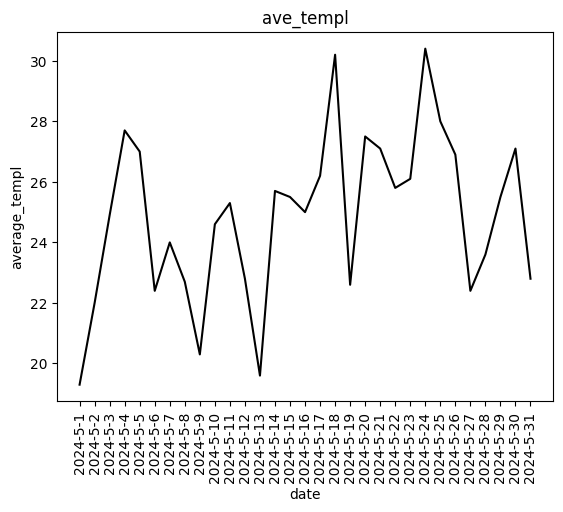

In [1]:
import requests
import json
import os
import csv
import pprint
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from db_create import table_create

def check_exist_file(filepath:str)->bool:
    p1 = pathlib.Path(filepath)
    return p1.exists()

def chimei_replace(chimei_keys):
    return chimei_keys.split('（')[0] #リスト化してくれた
# ある規則に従って、切り分けてリスト化してくれるのが、split 関数

url_kako = "https://api.cultivationdata.net/past"

number = 47636
year=2024
month =5

# number = int(input("国際地点番号を入力して"))
# year = int(input("何年が欲しい？"))
# month = int(input("何月？？"))

#クエリストリングス
# request_url = f"{url_kako}?no={number}&year={year}&month={month}"
# print(request_url)

params={
    "no": number,
    "year":year,
    "month":month
}



#毎回　取りに行くのを辞めたい　一回読み込んだらcsvとかjsonにして出力して
#そのファイルがあったら取りにかないようにif文を作りたい
#取りに行ったらjson出力 するプログラム

filename = f"{number}_{year}_{month}.csv"
raw_filename = f"raw_{number}_{year}_{month}.json"

# 保存するファイルのパスを指定
raw_output_folder='raw_folder'
raw_output_file = os.path.join(raw_output_folder,raw_filename)
fix_output_folder ='fix_folder'
fix_output_file=os.path.join(fix_output_folder,filename)

#ファイルの存在チェック
# p1 = pathlib.Path(f"raw_folder/{raw_filename}")
# if p1.exists():
rawfilepath = f"raw_folder/{raw_filename}"
if check_exist_file(rawfilepath):    
    print("rawあるよ")
    with open(raw_output_file,'r') as f:
        dict_response =json.load(f)
        chimei_keys = list(dict_response.keys())[0]
        date_keys = list(dict_response[chimei_keys].keys())

else:
    print("rawないよ")
    # フォルダが存在しない場合は作成
    os.makedirs(raw_output_folder, exist_ok=True)
    #リクエスト
    response = requests.get(url_kako,params=params)
    print(response.status_code)
    dict_response = response.json()   
    # JSONデータをファイルに書き込む
    with open(raw_output_file, 'w') as f:
        json.dump(dict_response, f, indent=4)      
        chimei_keys = list(dict_response.keys())[0] #リスト化して0番目を出す　例：愛知県（名古屋)だけ
        date_keys = list(dict_response[chimei_keys].keys()) #0番目のキーを使用して 値（2重になっている日付キー)を出力
    print(f"JSON rawdata saved to {raw_output_file}")

# response = requests.get(request_url)
# dict_response = response.json()   
# chimei_keys = list(dict_response.keys())[0]
# date_keys = list(dict_response[chimei_keys].keys())
# response = requests.get(request_url)
# dict_response = pprint.pprint(response.json())
# print("--------------------------------------------------------------------------------")
# print(dict_response)
# print(chimei_keys)
# print(date_keys)
# print(dict_response['名古屋（愛知県)']['2024-3-1']['平均気温'])
# print(dict_response['名古屋（愛知県)']['2024-3-1']['最高気温'])
# print(dict_response['名古屋（愛知県)']['2024-3-1']['最低気温'])
# print(dict_response[chimei_keys]['2024-3-1'])
# print(date_keys[3] in dict_response[chimei_keys])
# print(date_keys[2])

# test= list(dict_response[chimei_keys][date_keys[2]])
# print(test)
# print("--------------------------------------------------------------------------------")
# for i in date_keys: #for文のiには date_keysの最初の配列0番目が入る インデックス番号が入るわけではない 
#     with open()
#     ave_tmpl=dict_response[chimei_keys][i]['平均気温']
#     max_tmpl=dict_response[chimei_keys][i]['最高気温']
#     min_tmpl=dict_response[chimei_keys][i]['最低気温']
#     print(i)
#     print(i,"平均気温",dict_response[chimei_keys][i]['平均気温'])
#     print(i,"最高気温",dict_response[chimei_keys][i]['最高気温'])
#     print(i,"最低気温",dict_response[chimei_keys][i]['最低気温'])
    
# with open(filename, 'w', newline='') as write:
#     writer = csv.writer(write)
    
#     # ヘッダー行を追加
#     writer.writerow(['年月日', '平均気温','最高気温','最低気温'])
#         # 各行に対応するデータを1つずつ書き込む
#     for i in date_keys:
#         ave_tmpl=dict_response[chimei_keys][i]['平均気温']
#         max_tmpl=dict_response[chimei_keys][i]['最高気温']
#         min_tmpl=dict_response[chimei_keys][i]['最低気温']
#         writer.writerow([i,ave_tmpl, max_tmpl,min_tmpl])

print("--------------------------------------------------------------------------------")


# フォルダが存在しない場合は作成
os.makedirs(fix_output_folder, exist_ok=True)

# p2 = pathlib.Path(f"fix_folder/{raw_filename}")
# if p2.exists():
fixfilepath=f"fix_folder/{filename}"
if check_exist_file(fixfilepath):
    print("fixあるよ")
    for i in date_keys:
        ave_tmpl=dict_response[chimei_keys][i]['平均気温']
        max_tmpl=dict_response[chimei_keys][i]['最高気温']
        min_tmpl=dict_response[chimei_keys][i]['最低気温']
        print(i,"平均気温",dict_response[chimei_keys][i]['平均気温'],len(ave_tmpl))
        print(i,"最高気温",dict_response[chimei_keys][i]['最高気温'],len(max_tmpl))
        print(i,"最低気温",dict_response[chimei_keys][i]['最低気温'],len(min_tmpl))

else:
    print("fixないよ、作成します")
    with open(fix_output_file,"w",newline="") as writer:
        csvwriter=csv.writer(writer)
            # ヘッダー行を追加
        csvwriter.writerow(['indexNbr','date', 'temp_average','temp_high','temp_low'])
        # 各行に対応するデータを1つずつ書き込む
        for i in date_keys:
            ave_tmpl=dict_response[chimei_keys][i]['平均気温']
            max_tmpl=dict_response[chimei_keys][i]['最高気温']
            min_tmpl=dict_response[chimei_keys][i]['最低気温']
            print(i,"平均気温",dict_response[chimei_keys][i]['平均気温'],len(ave_tmpl))
            print(i,"最高気温",dict_response[chimei_keys][i]['最高気温'],len(max_tmpl))
            print(i,"最低気温",dict_response[chimei_keys][i]['最低気温'],len(min_tmpl))
            csvwriter.writerow([number,i,ave_tmpl, max_tmpl,min_tmpl])

new_chimei_keys=chimei_replace(chimei_keys)
print(new_chimei_keys)

table_name=f"{new_chimei_keys}_{number}_{year}_{month}"
print(table_name)

table_create(table_name)
print("いけた？")

fixfilepath

ave_tmpls=[]
max_tmpls=[]
min_tmpls=[]

for i in date_keys:
    ave_tmpls.append(float(dict_response[chimei_keys][i]['平均気温']))
    max_tmpls.append(float(dict_response[chimei_keys][i]['最高気温']))
    min_tmpls.append(float(dict_response[chimei_keys][i]['最低気温']))

data_x= np.array(date_keys)
max_y = np.array(max_tmpls)

plt.plot(data_x,max_y,color="black")
plt.title("ave_templ")
plt.xlabel("date")
plt.ylabel("average_templ")
plt.xticks(rotation=90)
plt.savefig("折れ線グラフ")#保存
plt.show()



# with open(fix_output_file,"w",newline="") as f:
#     input_date = {"A":"apple","B":"Banana","C":"peach"
#     }

#     writer.writerow(input_date)
#     input_date = [
#         {"A":"apple","B":"Banana","C":"peach"},
#         {"A":"orange","B":"abbb","C":"vccccc"},

#     ]    
#     writer.writerows(input_date)

# print(response.status_code    
# )

# print(response.text)#これはサーバーから来た文字列
# print(response.json())#サーバーから来た文字列をpythonデータ型(辞書)に変換

# # import json
# # print(json.loads(response.text)) #requestsの関数を使わずに変換できる
